# Imports and Constants:

In [202]:
import GEOMODEL as GEOMODEL
import finesse
finesse.configure(plotting=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scienceplots
from cycler import cycler


# Plot Results:

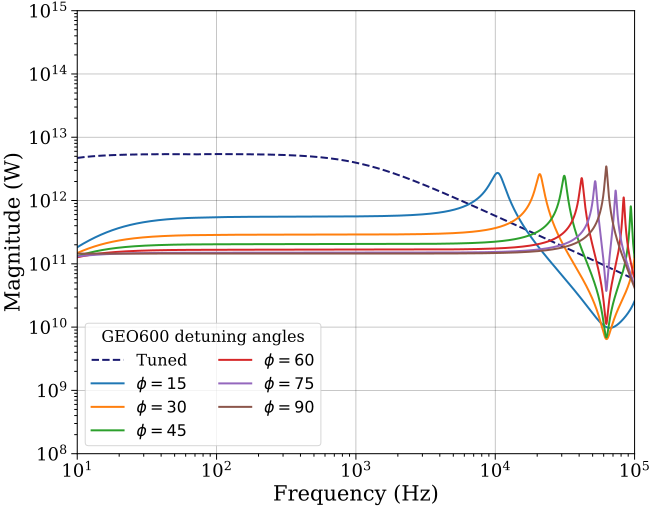

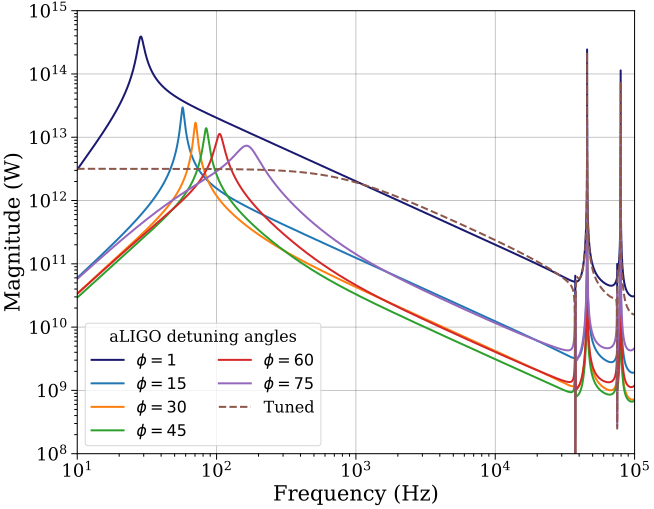

In [ ]:
# Make colors and dash list:
colors = ['midnightblue', '#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF', '#9A0EEA']
dash_GEO = ['dashed','solid', 'solid', 'solid', 'solid', 'solid', 'solid']
dash_LIGO = ['solid', 'solid', 'solid', 'solid', 'solid', 'solid', 'dashed']

# Plot Transfer Functions:
plot_tF(tF_List1, tFLabelsList1, correction_list, colors, dash_GEO, 'GEO600')
plot_tF(tF_List2, tFLabelsList2, correction_list2, colors, dash_LIGO, 'aLIGO')

# Brian Plots

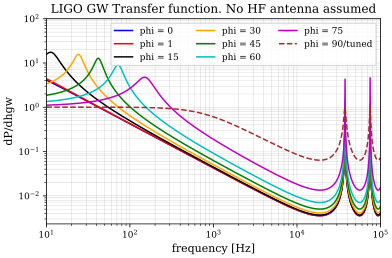

In [ ]:
L = 4000 /3e8
T_sr = 0.2
T_itm = 0.014


r_itm = np.sqrt(1-T_itm)

t_sr = np.sqrt(T_sr) 
r_sr = np.sqrt(1 - T_sr) 
ff = np.logspace(1,5,1000)
omeg = 2*np.pi*ff 
Omegap = np.abs(np.log(r_itm))/2/L # omega cavity pole
Cf = np.exp(1j*omeg*L) * np.sinh(Omegap*L)/ np.sinh(Omegap*L*(1+1j*omeg/Omegap))
G = np.sqrt(1-r_itm**2)/(1-r_itm)


Da = np.exp(-1j*omeg*L)/2*(np.exp(1j*omeg*L/2)*np.sinc(omeg*L/np.pi/2) + np.exp(-1j*omeg*L/2)*np.sinc(omeg*L/np.pi/2))
Da = 1 
dmichfp = np.exp(1j*omeg*L)*Da*L*G *Cf

rmfp = - (r_itm-np.exp(2 *1j* omeg* L))/(1-r_itm*np.exp(2 *1j* omeg* L))
dmichfpsrc = lambda phi: t_sr*dmichfp/(1- r_sr*rmfp*np.exp(1j*2*(-phi)/180*np.pi)) # note that this phi varies over 360, but as andrew and I discussed, I am only considering positive frequency sidebands which if you add positive and negative frequency response, it does get this answer without adding this sign.



pp = [i*30 for i in range(14)]
# pp = [i*30 for i in range(7)]
i = np.argmin((ff - 100)**2)
norm = np.abs(dmichfpsrc(90))[i]
pp = [0, 1, 15, 30, 45, 60, 75]
for p in pp:
    plt.loglog(ff, np.abs(dmichfpsrc(p))/norm, label = f"phi = {p}")
plt.loglog(ff, np.abs(dmichfpsrc(90))/norm, label = f"phi = {90}/tuned", c = "brown", ls="--")

plt.xlabel("frequency [Hz]")
plt.ylabel("dP/dhgw")
plt.title("LIGO GW Transfer function. No HF antenna assumed")
plt.ylim(top=1e2)
plt.legend(loc=0,ncols=3)

# plt.savefig("04-23-25-brian-tf.pdf", bbox_inches='tight')
plt.show()


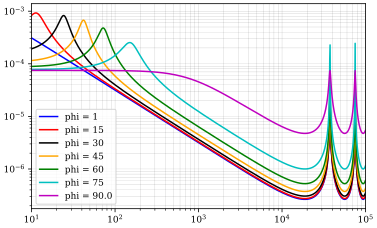

In [ ]:
# negative frequency demonstration

L = 4000 /3e8
T_sr = 0.2
T_itm = 0.014


r_itm = np.sqrt(1-T_itm)

t_sr = np.sqrt(T_sr) 
r_sr = np.sqrt(1 - T_sr) 
ffp = np.logspace(1,5,1000)
ffm = - np.flip(ffp)
ff = np.concatenate((ffm, ffp))
omeg = 2*np.pi*ff 
Omegap = np.abs(np.log(r_itm))/2/L # omega cavity pole
Cf = np.exp(1j*omeg*L) * np.sinh(Omegap*L)/ np.sinh(Omegap*L*(1+1j*omeg/Omegap))
G = np.sqrt(1-r_itm**2)/(1-r_itm)


Da = np.exp(-1j*omeg*L)/2*(np.exp(1j*omeg*L/2)*np.sinc(omeg*L/np.pi/2) + np.exp(-1j*omeg*L/2)*np.sinc(omeg*L/np.pi/2))
Da = 1 
dmichfp = np.exp(1j*omeg*L)*Da*L*G *Cf

rmfp = - (r_itm-np.exp(2 *1j* omeg* L))/(1-r_itm*np.exp(2 *1j* omeg* L))
dmichfpsrc = lambda phi: t_sr*dmichfp/(1- r_sr*rmfp*np.exp(1j*2*(phi)/180*np.pi))

dmichfpsrcp = lambda phi: dmichfpsrc(phi)[len(ffp):]
dmichfpsrcn = lambda phi: np.flip(dmichfpsrc(phi)[:len(ffp)])

pp = [i*30 for i in range(14)]
# pp = [i*30 for i in range(7)]
i = np.argmin((ffp - 100)**2)
norm = np.abs(dmichfpsrcp(90) + dmichfpsrcn(90))[i]
pp = [1, 15, 30, 45, 60, 75, 90.]
for p in pp:
    plt.loglog(ffp, np.sqrt(np.abs(dmichfpsrcp(p))**2 + np.abs(dmichfpsrcn(p))**2), label = f"phi = {p}")


# plt.ylim(1e-3,1e2)
plt.legend(loc=0)
plt.show()


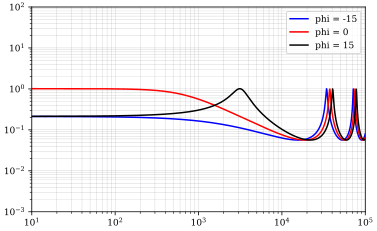

In [ ]:

# michael results. Basically just the same when Tit -> 1 limit (note the frequency flip is not done here )
L = 4000 /3e8
T_sr = 0.20 
T_itm = 1 # 0.014


r_itm = np.sqrt(1-T_itm)

t_sr = np.sqrt(T_sr) 
r_sr = np.sqrt(1 - T_sr) 
ff = np.logspace(1,5,1000)
omeg = 2*np.pi*ff 
Omegap = np.inf #np.abs(np.log(r_itm))/2/L # omega cavity pole
Cf = np.exp(1j*omeg*L) 
G = np.sqrt(1-r_itm**2)/(1-r_itm)


Da = np.exp(-1j*omeg*L)/2*(np.exp(1j*omeg*L/2)*np.sinc(omeg*L/np.pi/2) + np.exp(-1j*omeg*L/2)*np.sinc(omeg*L/np.pi/2))
Da = 1 
dmichfp = np.exp(1j*omeg*L)*Da*L*G *Cf

rmfp = - (r_itm-np.exp(2 *1j* omeg* L))/(1-r_itm*np.exp(2 *1j* omeg* L))
dmichfpsrc = lambda phi: t_sr*dmichfp/(1- r_sr*rmfp*np.exp(1j*2*(-phi)/180*np.pi))

pp = [i*30 for i in range(14)]
# pp = [i*30 for i in range(7)]
i = np.argmin((ff - 100)**2)
norm = np.abs(dmichfpsrc(0))[i]
pp = [-15,0,15]
for p in pp:
    plt.loglog(ff, np.abs(dmichfpsrc(p))/norm, label = f"phi = {p}")


plt.ylim(1e-3,1e2)
plt.legend(loc=0)
plt.show()
